<a href="https://colab.research.google.com/github/anni990/Web-Scraping-Mini-Project-2/blob/main/Github_topicwise_repo_Scraped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <<======= Mini Project On Web Scrapping =======>>


## Scraping the top repos info from Github topic-wise
  ### - Top 30 repos info:
     - Topic_name
     - Repo_Owner_name
     - Repo_name
     - Stars
     - Repo_url

### Image for the rough idea of a repo.
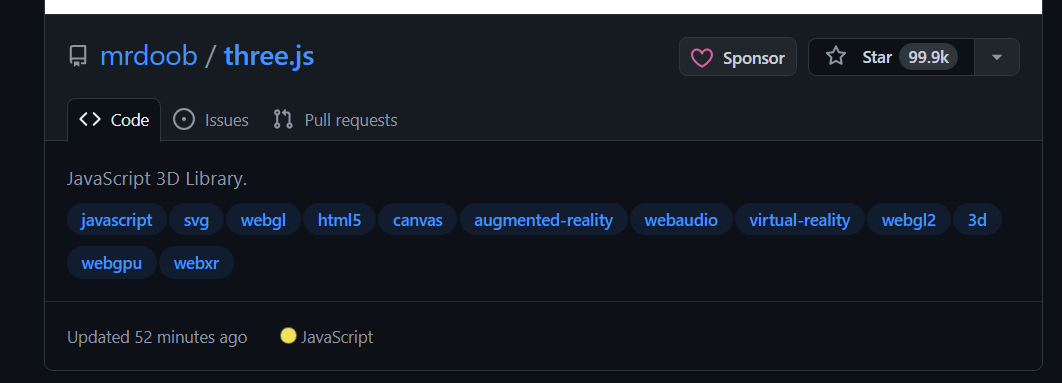

## Url of Web page -->

- url_1 = https://github.com/topics

## Urls of topic_wise Web pages ->

- https://github.com/topics/3d      
- https://github.com/topics/ajax    
- https://github.com/topics/algorithm   
- https://github.com/topics/amphp  
- https://github.com/topics/android  
- https://github.com/topics/angular  
- https://github.com/topics/ansible  
- https://github.com/topics/api  
- https://github.com/topics/arduino  
- https://github.com/topics/aspnet  
- https://github.com/topics/awesome  
- https://github.com/topics/aws  
- https://github.com/topics/azure  
- https://github.com/topics/babel  
- https://github.com/topics/bash  
- https://github.com/topics/bitcoin  
- https://github.com/topics/bootstrap  
- https://github.com/topics/bot  
- https://github.com/topics/c  
- https://github.com/topics/chrome  
- https://github.com/topics/chrome-extension  
- https://github.com/topics/cli  
- https://github.com/topics/clojure  
- https://github.com/topics/code-quality  
- https://github.com/topics/code-review  
- https://github.com/topics/compiler  
- https://github.com/topics/continuous-integration  
- https://github.com/topics/cpp  
- https://github.com/topics/cryptocurrency  
- https://github.com/topics/crystal  


In [ ]:
import requests

In [ ]:
# Sends request to the server and returns the code of that web page.
web_page = requests.get('https://github.com/topics')

In [ ]:
web_page.status_code

200

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(web_page.content,'html.parser') # Object of Beautiful Soup.

In [ ]:
# Extracting link_tag.
link_tag = soup.find_all('a',class_ = 'no-underline flex-1 d-flex flex-column')

In [ ]:
# complete the link
'https://github.com' + link_tag[0]['href']

'https://github.com/topics/3d'

In [ ]:
# Append all the topic links into a list.

link_list = []
for i in link_tag:
  link_list.append('https://github.com'+i['href'])
print(link_list)

['https://github.com/topics/3d', 'https://github.com/topics/ajax', 'https://github.com/topics/algorithm', 'https://github.com/topics/amphp', 'https://github.com/topics/android', 'https://github.com/topics/angular', 'https://github.com/topics/ansible', 'https://github.com/topics/api', 'https://github.com/topics/arduino', 'https://github.com/topics/aspnet', 'https://github.com/topics/awesome', 'https://github.com/topics/aws', 'https://github.com/topics/azure', 'https://github.com/topics/babel', 'https://github.com/topics/bash', 'https://github.com/topics/bitcoin', 'https://github.com/topics/bootstrap', 'https://github.com/topics/bot', 'https://github.com/topics/c', 'https://github.com/topics/chrome', 'https://github.com/topics/chrome-extension', 'https://github.com/topics/cli', 'https://github.com/topics/clojure', 'https://github.com/topics/code-quality', 'https://github.com/topics/code-review', 'https://github.com/topics/compiler', 'https://github.com/topics/continuous-integration', 'ht

In [ ]:
# Extracting the repo page of first topic - '3D'.
topic_page = requests.get(link_list[0])

In [ ]:
# Checking the success or faliure of the request.
topic_page.status_code

200

In [ ]:
# Appyling Beautiful Soup to extract and parse that web_page.
soup1 = BeautifulSoup(topic_page.content,'html.parser')

In [ ]:
# Extract the heading (topic_name) of the page.

div_tag = soup1.find_all('div',class_ = 'd-flex flex-1')
h1_tag = div_tag[1].find_all('h1')
topic_name = h1_tag[0].text.strip()

In [ ]:
topic_name

'3D'

In [ ]:
# Extracting h3_tag which contain a_tags.
h3_tag = soup1.find_all('h3',class_ = 'f3 color-fg-muted text-normal lh-condensed')

In [ ]:
h3_tag[0]

<h3 class="f3 color-fg-muted text-normal lh-condensed">
<a class="Link" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"OWNER","click_visual_representation":"REPOSITORY_OWNER_HEADING","actor_id":null,"record_id":97088,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="c72fbd5c69a8ee7c9c53a4e65de2b93c8fc7552dd793945819639bc165c0f0ba" data-turbo="false" data-view-component="true" href="/mrdoob">
            mrdoob
</a>          /
          <a class="Link text-bold wb-break-word" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":576201,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="4a2667db3d63a1739c412e059e5da95afe419df83f70949b5d59dc3478f5c79a" data-turbo="false" data-view-component="true" href

In [ ]:
len(h3_tag)

20

In [ ]:
# Extracting a_tag which contains owner_name and repo_name and link .
a_tag = h3_tag[0].find_all('a')

In [ ]:
# Owner_name.
a_tag[0].text.strip()

'mrdoob'

In [ ]:
# Repo_name.
a_tag[1].text.strip()

'three.js'

In [ ]:
# Link.
'https://github.com' + a_tag[1]['href']

'https://github.com/mrdoob/three.js'

In [ ]:
# Extracting the span_tag which contains star_count.
star_tag = soup1.find_all('span',class_ = 'Counter js-social-count')

In [ ]:
# Stars
star_tag[0].text.strip()

'99.9k'

In [ ]:
# Combined Function of all the tags which returns 'topic_name, username, repo_name, star, url'.

def get_repo_info(h3_tag,star_tag,div_tag):
  d_tag = div_tag.find_all('h1')
  topic_name = d_tag[0].text.strip()
  a_tag = h3_tag.find_all('a')
  username = a_tag[0].text.strip()
  repo_name = a_tag[1].text.strip()
  star = star_tag.text.strip()
  url = 'https://github.com' + a_tag[1]['href']
  return topic_name,username,repo_name,star,url

In [ ]:
# Checking og the First repo.
get_repo_info(h3_tag[0],star_tag[0],div_tag[1])

('3D', 'mrdoob', 'three.js', '99.9k', 'https://github.com/mrdoob/three.js')

In [ ]:
# Checking og the Second repo.
get_repo_info(h3_tag[1],star_tag[1],div_tag[1])

('3D',
 'pmndrs',
 'react-three-fiber',
 '26.4k',
 'https://github.com/pmndrs/react-three-fiber')

In [ ]:
# Checking og the Third repo.
get_repo_info(h3_tag[2],star_tag[2],div_tag[1])

('3D', 'libgdx', 'libgdx', '22.9k', 'https://github.com/libgdx/libgdx')

In [ ]:
# Dictionary which will contains 'topic_name, username, repo_name, star, url' of all repositaries in the form of list.

repo_info_dict = {
    'topic_name' : [],
    'username' : [],
    'repo_name' : [],
    'stars' : [],
    'url' : []
}

# Loop which appends the data into the dictionary.

for i in range(len(h3_tag)):
  repo_info = get_repo_info(h3_tag[i],star_tag[i],div_tag[1])
  repo_info_dict['topic_name'].append(repo_info[0])
  repo_info_dict['username'].append(repo_info[1])
  repo_info_dict['repo_name'].append(repo_info[2])
  repo_info_dict['stars'].append(repo_info[3])
  repo_info_dict['url'].append(repo_info[4])

In [ ]:
import pandas as pd

In [ ]:
# Saving the data of dictionary into pandas dataFrame.
topic1_repo_data = pd.DataFrame(repo_info_dict)

In [ ]:
# Top 30 repo info of the first topic.
topic1_repo_data.head()

,topic_name,username,repo_name,stars,url
0,3D,mrdoob,three.js,99.9k,https://github.com/mrdoob/three.js
1,3D,pmndrs,react-three-fiber,26.4k,https://github.com/pmndrs/react-three-fiber
2,3D,libgdx,libgdx,22.9k,https://github.com/libgdx/libgdx
3,3D,BabylonJS,Babylon.js,22.7k,https://github.com/BabylonJS/Babylon.js
4,3D,ssloy,tinyrenderer,19.7k,https://github.com/ssloy/tinyrenderer


In [ ]:
# Function which takes url of the topic and return the dataFrame of the repo info data.
# Created Using the combinations of above cells.

def get_response_func(topic_url):
  topic_page = requests.get(topic_url)
  soup1 = BeautifulSoup(topic_page.text,'html.parser')
  h3_tag = soup1.find_all('h3',class_ = 'f3 color-fg-muted text-normal lh-condensed')
  star_tag = soup1.find_all('span',class_ = 'Counter js-social-count')
  div_tag = soup1.find_all('div',class_ = 'd-flex flex-1')

  repo_info_dict = {
    'topic_name' : [],
    'username' : [],
    'repo_name' : [],
    'stars' : [],
    'url' : []
  }
  for i in range(len(h3_tag)):
    repo_info = get_repo_info(h3_tag[i],star_tag[i],div_tag[1])
    repo_info_dict['topic_name'].append(repo_info[0])
    repo_info_dict['username'].append(repo_info[1])
    repo_info_dict['repo_name'].append(repo_info[2])
    repo_info_dict['stars'].append(repo_info[3])
    repo_info_dict['url'].append(repo_info[4])
  return pd.DataFrame(repo_info_dict)

## Now Call this function in a loop .

- range -> Count of the number of links persent in the topic page.
- Concatinate the first function result into the empty dataframe and add upcoming function result should be concatinated to that same dataFrame.
- So that it results into a single dataFrame (final_Scraped_data) of top-30 repositaries topic wise.

In [ ]:
final_Scraped_data = pd.DataFrame()
for i in range(len(link_list)):
  final_Scraped_data = pd.concat([final_Scraped_data,get_response_func(link_list[i])],ignore_index = True)

# Combined all the above functions and variables in a single cell.

###  - This cell is itself sufficient to scrape all the data which we want.

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
web_page = requests.get('https://github.com/topics')
soup = BeautifulSoup(web_page.content,'html.parser') # Object of Beautiful Soup.
link_tag = soup.find_all('a',class_ = 'no-underline flex-1 d-flex flex-column')
link_list = []
for i in link_tag:
  link_list.append('https://github.com'+i['href'])

def get_repo_info(h3_tag,star_tag,div_tag):
  d_tag = div_tag.find_all('h1')
  topic_name = d_tag[0].text.strip()
  a_tag = h3_tag.find_all('a')
  username = a_tag[0].text.strip()
  repo_name = a_tag[1].text.strip()
  star = star_tag.text.strip()
  url = 'https://github.com' + a_tag[1]['href']
  return topic_name,username,repo_name,star,url

def get_response_func(topic_url):
  topic_page = requests.get(topic_url)
  soup1 = BeautifulSoup(topic_page.text,'html.parser')
  h3_tag = soup1.find_all('h3',class_ = 'f3 color-fg-muted text-normal lh-condensed')
  star_tag = soup1.find_all('span',class_ = 'Counter js-social-count')
  div_tag = soup1.find_all('div',class_ = 'd-flex flex-1')

  repo_info_dict = {
    'topic_name' : [],
    'username' : [],
    'repo_name' : [],
    'stars' : [],
    'url' : []
  }
  for i in range(len(h3_tag)):
    repo_info = get_repo_info(h3_tag[i],star_tag[i],div_tag[1])
    repo_info_dict['topic_name'].append(repo_info[0])
    repo_info_dict['username'].append(repo_info[1])
    repo_info_dict['repo_name'].append(repo_info[2])
    repo_info_dict['stars'].append(repo_info[3])
    repo_info_dict['url'].append(repo_info[4])
  return pd.DataFrame(repo_info_dict)

final_Scraped_data = pd.DataFrame()
for i in range(len(link_list)):
  final_Scraped_data = pd.concat([final_Scraped_data,get_response_func(link_list[i])],ignore_index = True)

In [ ]:
final_Scraped_data.shape

(600, 5)

In [ ]:
final_Scraped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   topic_name  600 non-null    object
 1   username    600 non-null    object
 2   repo_name   600 non-null    object
 3   stars       600 non-null    object
 4   url         600 non-null    object
dtypes: object(5)
memory usage: 23.6+ KB


In [ ]:
final_Scraped_data

,topic_name,username,repo_name,stars,url
0,3D,mrdoob,three.js,99.9k,https://github.com/mrdoob/three.js
1,3D,pmndrs,react-three-fiber,26.4k,https://github.com/pmndrs/react-three-fiber
2,3D,libgdx,libgdx,22.9k,https://github.com/libgdx/libgdx
3,3D,BabylonJS,Babylon.js,22.7k,https://github.com/BabylonJS/Babylon.js
4,3D,ssloy,tinyrenderer,19.7k,https://github.com/ssloy/tinyrenderer
...,...,...,...,...,...
595,Crystal,will,crystal-pg,459,https://github.com/will/crystal-pg
596,Crystal,elbywan,crystalline,422,https://github.com/elbywan/crystalline
597,Crystal,imdrasil,jennifer.cr,414,https://github.com/imdrasil/jennifer.cr
598,Crystal,vim-crystal,vim-crystal,412,https://github.com/vim-crystal/vim-crystal


## Save this data into the csv file

In [ ]:
final_Scraped_data.to_csv('topic-wise-repos.csv')

Done

-------------------------------------------